In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install mlxtend

In [3]:
from mlxtend.plotting import plot_decision_regions

In [4]:
df = pd.DataFrame()

In [5]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [6]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

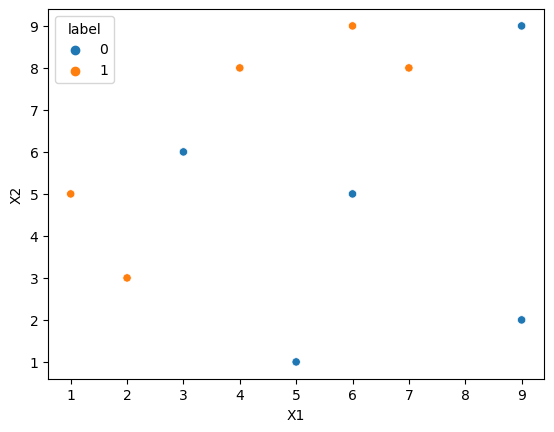

In [7]:
import seaborn as sns
sns.scatterplot(x = df['X1'], y= df['X2'], hue=df['label'])

In [8]:
df['weight'] = 1/df.shape[0]

In [9]:
df

,X1,X2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [12]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [13]:
# step 2
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

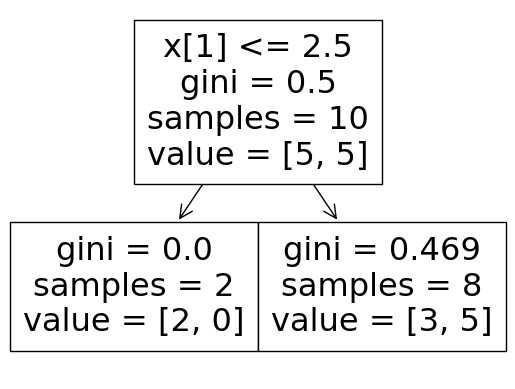

In [14]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

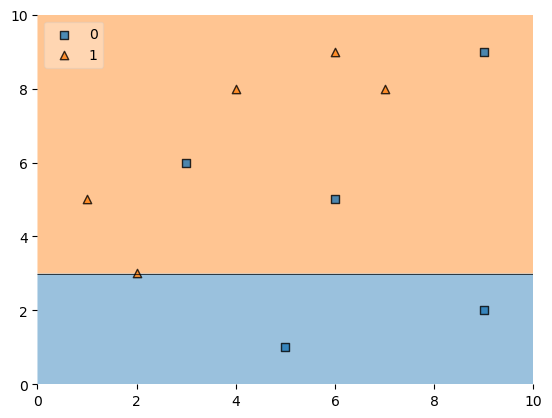

In [15]:
plot_decision_regions(X,y,clf=dt1, legend=2)

In [16]:
df['y_pred'] = dt1.predict(X)

In [17]:
df

,X1,X2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [18]:
def calulate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [19]:
alpha1 = calulate_model_weight(0.3)
alpha1

0.42364893019360184

In [20]:
def update_row_weight(row, alpha = 0.423):
    if row['label'] == row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)

In [21]:
df['updated_weight'] = df.apply(update_row_weight,axis=1)

In [22]:
df

,X1,X2,label,weight,y_pred,updated_weight
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [23]:
df['updated_weight'].sum()

0.9165153319682015

In [24]:
df['normalize'] = df['updated_weight']/df['updated_weight'].sum()

In [25]:
df['normalize'].sum()

1.0

In [26]:
df['upper']= np.cumsum(df['normalize'])

In [27]:
df['lower'] = df['upper']- df['normalize']

In [28]:
df

,X1,X2,label,weight,y_pred,updated_weight,normalize,upper,lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [29]:
def create_new_dataset(df):
    indicies = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['upper'] > a and a > row['lower']:
                indicies.append(index)
    return indicies

In [30]:
index_values = create_new_dataset(df)

In [31]:
index_values

[9, 7, 1, 5, 1, 4, 8, 9, 7, 7]

In [32]:
second_df = df.iloc[index_values, [0,1,2,3]]

In [33]:
second_df

,X1,X2,label,weight
9,9,2,0,0.1
7,7,8,1,0.1
1,2,3,1,0.1
5,6,9,1,0.1
1,2,3,1,0.1
4,5,1,0,0.1
8,9,9,0,0.1
9,9,2,0,0.1
7,7,8,1,0.1
7,7,8,1,0.1


In [34]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [35]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [36]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]')]

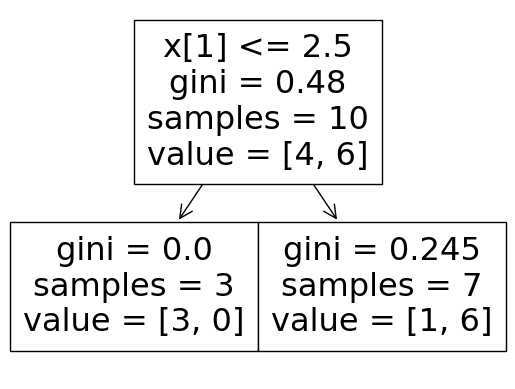

In [37]:
plot_tree(dt2)

<Axes: >

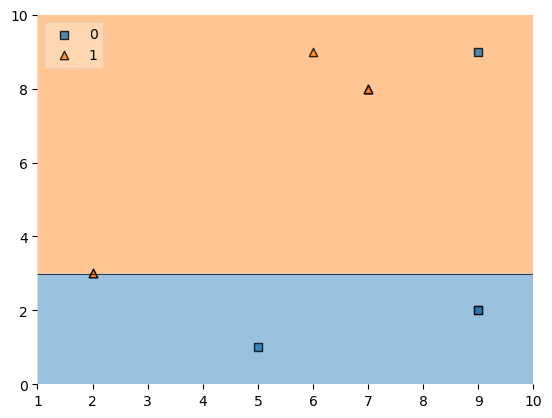

In [38]:
plot_decision_regions(X,y,clf=dt2, legend=2)

In [39]:
second_df['y_pred'] = dt2.predict(X)

In [40]:
second_df

,X1,X2,label,weight,y_pred
9,9,2,0,0.1,0
7,7,8,1,0.1,1
1,2,3,1,0.1,1
5,6,9,1,0.1,1
1,2,3,1,0.1,1
4,5,1,0,0.1,0
8,9,9,0,0.1,1
9,9,2,0,0.1,0
7,7,8,1,0.1,1
7,7,8,1,0.1,1


In [41]:
alpha2 = calulate_model_weight(0.1)

In [42]:
alpha2

1.0986122886681098

In [43]:
def update_row_weight(row, alpha = 1.09):
    if row['label'] == row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)

In [44]:
second_df['updated_weight'] = second_df.apply(update_row_weight,axis=1)

In [45]:
second_df

,X1,X2,label,weight,y_pred,updated_weight
9,9,2,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
4,5,1,0,0.1,0,0.033622
8,9,9,0,0.1,1,0.297427
9,9,2,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622


In [46]:
second_df['updated_weight'].sum()

0.6000222515923667

In [47]:
second_df['normalize'] = second_df['updated_weight']/second_df['updated_weight'].sum()

In [48]:
second_df

,X1,X2,label,weight,y_pred,updated_weight,normalize
9,9,2,0,0.1,0,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,1,0.297427,0.495694
9,9,2,0,0.1,0,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034


In [49]:
second_df['normalize'].sum()

0.9999999999999999

In [50]:
second_df['upper']= np.cumsum(second_df['normalize'])

In [51]:
second_df['lower'] = second_df['upper']- second_df['normalize']

In [52]:
second_df

,X1,X2,label,weight,y_pred,updated_weight,normalize,upper,lower
9,9,2,0,0.1,0,0.033622,0.056034,0.056034,0.000000
7,7,8,1,0.1,1,0.033622,0.056034,0.112068,0.056034
1,2,3,1,0.1,1,0.033622,0.056034,0.168102,0.112068
5,6,9,1,0.1,1,0.033622,0.056034,0.224136,0.168102
1,2,3,1,0.1,1,0.033622,0.056034,0.280170,0.224136
4,5,1,0,0.1,0,0.033622,0.056034,0.336204,0.280170
8,9,9,0,0.1,1,0.297427,0.495694,0.831898,0.336204
9,9,2,0,0.1,0,0.033622,0.056034,0.887932,0.831898
7,7,8,1,0.1,1,0.033622,0.056034,0.943966,0.887932
7,7,8,1,0.1,1,0.033622,0.056034,1.000000,0.943966


In [53]:
second_df[['X1','X2','label','weight','y_pred','normalize','lower','upper']]

,X1,X2,label,weight,y_pred,normalize,lower,upper
9,9,2,0,0.1,0,0.056034,0.000000,0.056034
7,7,8,1,0.1,1,0.056034,0.056034,0.112068
1,2,3,1,0.1,1,0.056034,0.112068,0.168102
5,6,9,1,0.1,1,0.056034,0.168102,0.224136
1,2,3,1,0.1,1,0.056034,0.224136,0.280170
4,5,1,0,0.1,0,0.056034,0.280170,0.336204
8,9,9,0,0.1,1,0.495694,0.336204,0.831898
9,9,2,0,0.1,0,0.056034,0.831898,0.887932
7,7,8,1,0.1,1,0.056034,0.887932,0.943966
7,7,8,1,0.1,1,0.056034,0.943966,1.000000


In [54]:
index_values = create_new_dataset(second_df)

In [55]:
third_df = second_df.iloc[index_values, [0,1,2,3]]

In [56]:
third_df

,X1,X2,label,weight
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
9,9,2,0,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1


In [57]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [58]:
X = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

In [59]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 5.0\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]')]

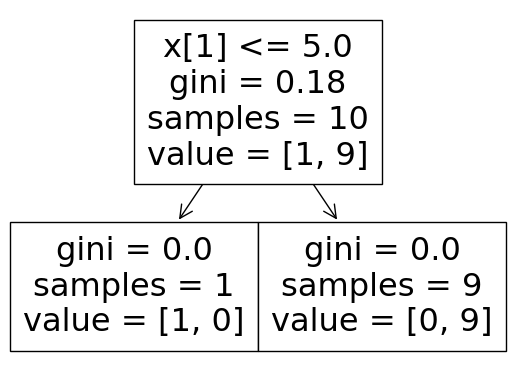

In [60]:
plot_tree(dt3)

<Axes: >

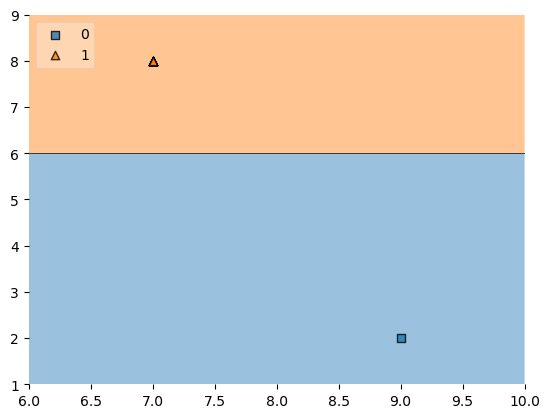

In [61]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [62]:
third_df['y_pred'] = dt3.predict(X)

In [63]:
third_df

,X1,X2,label,weight,y_pred
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
9,9,2,0,0.1,0
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1


In [ ]:
aplha3 = calulate_model_weight(0.1)